# Glasstype Dataset

## 1. Data Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
# read dataset
glasstype = pd.read_csv('glasstypePrediction.csv')
glasstype.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
glasstype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


/home/feras/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/feras/.local/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/feras/.local/lib/python3.10/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/feras/.local/lib/python3.10/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated an

<Axes: >

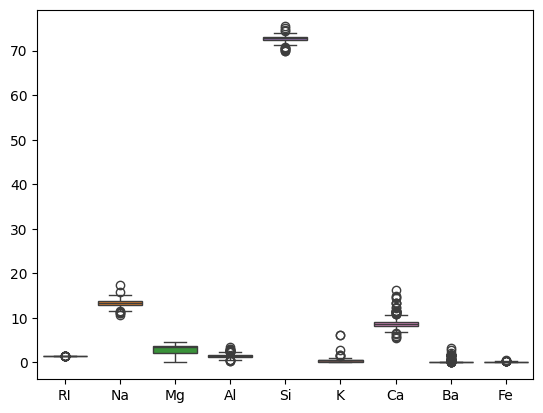

In [ ]:
sns.boxplot(glasstype.drop('Type',axis=1))

## 2. Data Preprocessing

In [ ]:
# remove outliers using the IQR method
Q1 = glasstype.quantile(0.25)
Q3 = glasstype.quantile(0.75)
IQR = Q3 - Q1

glasstype = glasstype[~((glasstype < (Q1 - 1.5 * IQR)) | (glasstype > (Q3 + 1.5 * IQR))).any(axis=1)]

# separate features and target variable after removing outliers
X = glasstype.drop(['Type'], axis=1)
y = glasstype['Type']

In [ ]:
from sklearn.linear_model import Ridge

# create an instance of the Ridge model
model = Ridge(alpha=0.1, random_state=0)

# fit the model
model.fit(X, y)

# concatenate X and y without outliers
glasstype = pd.concat([X, y], axis=1)


## 3.0. Data Preparation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


## 3.1 Random Forest

In [ ]:
# random forest model
from sklearn.ensemble import RandomForestClassifier

# create an instance of the model
rf_glass = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model
rf_glass.fit(X_train, y_train)

# make predictions
y_pred = rf_glass.predict(X_test)

# calculate accuracy
glasstype_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f" % glasstype_accuracy)

# calculate root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: %.2f' % rmse)

Accuracy: 0.71
RMSE: 0.84


## 3.2 Adaboost

In [ ]:
# implement adaboost model
from sklearn.ensemble import AdaBoostClassifier


# create an instance of the model
ada = AdaBoostClassifier(n_estimators=100, random_state=0)

# fit the model
ada.fit(X_train, y_train)

# make predictions
y_pred = ada.predict(X_test)

# calculate accuracy
glasstype_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: %.2f" % glasstype_accuracy)

# calculate root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: %.2f' % rmse)

Accuracy: 0.68
RMSE: 1.12


/home/feras/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## 3.3 Gradient Boost

In [ ]:
# implement gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier

# create an instance of the model
gb = GradientBoostingClassifier(n_estimators=100, random_state=0)

# fit the model
gb.fit(X_train, y_train)

# make predictions
y_pred = gb.predict(X_test)

# calculate accuracy
glasstype_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f" % glasstype_accuracy)

# calculate root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: %.2f' % rmse)

Accuracy: 0.71
RMSE: 0.77


## 4. Data Preparation for GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

adaboost_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}



### 3.1 Random Forest

In [ ]:
# Random Forest grid search
rf_grid_search = GridSearchCV(rf_glass, rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

print("Random Forest - Best Parameters:", rf_grid_search.best_params_)

/home/feras/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Random Forest - Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


### 3.2 Adaboost

In [ ]:
ada_grid_search = GridSearchCV(ada, adaboost_param_grid, cv=5, scoring='accuracy')
ada_grid_search.fit(X_train, y_train)

print("AdaBoost - Best Parameters:", ada_grid_search.best_params_)

/home/feras/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/feras/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/feras/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/feras/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/feras/.local/lib/python3.10/site-packag

AdaBoost - Best Parameters: {'learning_rate': 1, 'n_estimators': 50}


/home/feras/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


### 3.3 Gradient Boost

In [ ]:
gb_grid_search = GridSearchCV(gb, gb_param_grid, cv=5, scoring='accuracy')
gb_grid_search.fit(X_train, y_train)

print("Gradient Boosting - Best Parameters:", gb_grid_search.best_params_)

/home/feras/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Gradient Boosting - Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}


## 5. Analysis

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

rf_best = rf_grid_search.best_estimator_
ada_best = ada_grid_search.best_estimator_
gb_best = gb_grid_search.best_estimator_

models = [rf_best, ada_best, gb_best]

glasstype_model_names = ["Random Forest", "AdaBoost", "Gradient Boosting"]
glasstype_model_accuracy = []
glasstype_model_precision = []
glasstype_model_recall = []
glasstype_model_f1 = []

for i, model in enumerate(models):
    y_pred = model.predict(X_test)
    glasstype_model_accuracy.append(accuracy_score(y_test, y_pred))
    glasstype_model_precision.append(precision_score(y_test, y_pred, average='weighted'))
    glasstype_model_recall.append(recall_score(y_test, y_pred, average="weighted"))
    glasstype_model_f1.append(f1_score(y_test, y_pred, average="weighted"))

    print(glasstype_model_names[i])
    print(confusion_matrix(y_test, y_pred))
    print()

Random Forest
[[17  2  2  0]
 [ 2 12  3  0]
 [ 1  0  1  0]
 [ 0  1  0  0]]

AdaBoost
[[16  4  0  0  1]
 [ 5 12  0  0  0]
 [ 2  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  0  0  0]]

Gradient Boosting
[[16  2  3  0]
 [ 5 11  1  0]
 [ 1  0  1  0]
 [ 0  0  0  1]]



/home/feras/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/feras/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/feras/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from IPython.display import display, Markdown

result = f"""
<center>

| Model | Accuracy | Precision | Recall | F1-Score |
|-------|----------|-----------|--------|----------|
|  RnF  |  {glasstype_model_accuracy[0]:.4f}  |    {glasstype_model_precision[0]:.4f}    | {glasstype_model_recall[0]:.4f} |  {glasstype_model_f1[0]:.4f}  |
|  AdB  |  {glasstype_model_accuracy[1]:.4f}  |    {glasstype_model_precision[1]:.4f}    | {glasstype_model_recall[1]:.4f} |  {glasstype_model_f1[1]:.4f}  |
|  GrB  |  {glasstype_model_accuracy[2]:.4f}  |    {glasstype_model_precision[2]:.4f}    | {glasstype_model_recall[2]:.4f} |  {glasstype_model_f1[2]:.4f}  |

</center>
"""

display(Markdown(result))


<center>

| Model | Accuracy | Precision | Recall | F1-Score |
|-------|----------|-----------|--------|----------|
|  RnF  |  0.7317  |    0.7752    | 0.7317 |  0.7479  |
|  AdB  |  0.6829  |    0.6490    | 0.6829 |  0.6652  |
|  GrB  |  0.7073  |    0.7575    | 0.7073 |  0.7236  |

</center>


## 6. Visualization

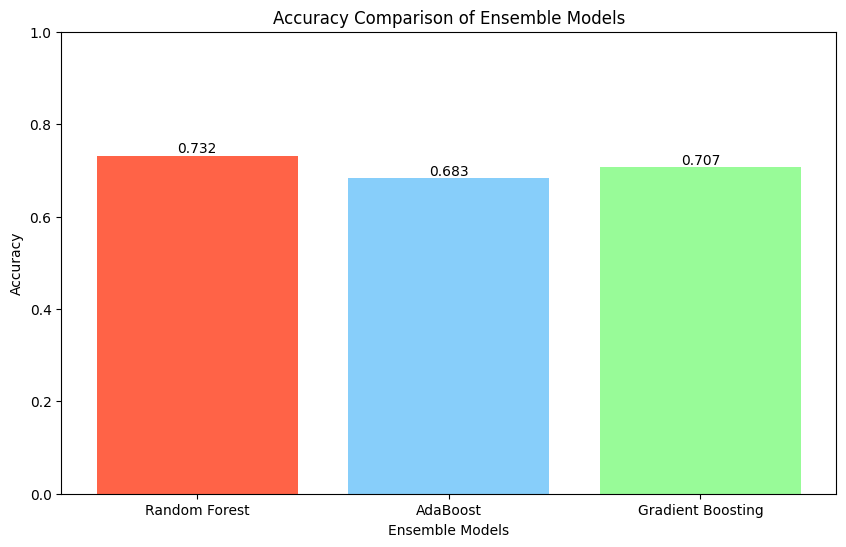

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their accuracies
model_names = ['Random Forest', 'AdaBoost', 'Gradient Boosting']
glasstype_accuracies = [
    glasstype_model_accuracy[0],
    glasstype_model_accuracy[1],
    glasstype_model_accuracy[2],
]

# Define pastel colors
colors =  ['#FF6347', '#87CEFA', '#98FB98']

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(model_names, glasstype_accuracies, color=colors)

# Add labels and title
plt.xlabel('Ensemble Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Ensemble Models')
plt.ylim(0.0, 1.0)

# Add data labels on top of each bar
for bar, accuracy in zip(bars, glasstype_accuracies):
    yval = accuracy
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 3), ha='center', va='bottom', fontsize=10)

plt.show()

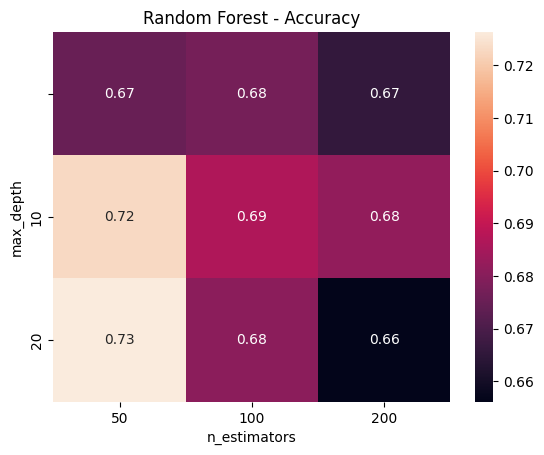

In [ ]:
glasstype_accuracy = np.array(gb_grid_search.cv_results_["mean_test_score"]).reshape(
    3, 3, 3, 3
)
glasstype_accuracy = glasstype_accuracy.mean(axis=(2, 3))

import seaborn as sns

sns.heatmap(
    glasstype_accuracy,
    annot=True,
    xticklabels=rf_param_grid["n_estimators"],
    yticklabels=rf_param_grid["max_depth"],
)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('Random Forest - Accuracy')
plt.show()